In [1]:
import warnings
import jieba    
import numpy    
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas as pd  
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from scipy.misc import imread
from wordcloud import WordCloud,ImageColorGenerator #词云包

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

In [4]:
df = pd.read_csv("data/entertainment_news.csv", encoding='utf-8')
df = df.dropna()
content=df.content.values.tolist()
segment=[]
for line in content:
    try:
        segs=jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print(line)
        continue

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\AGENTD~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.973 seconds.
Prefix dict has been built succesfully.


In [5]:
words_df=pd.DataFrame({'segment':segment})
#quoting=3全不引用
stopwords=pd.read_csv("data/stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
words_stat.head()

,segment,计数
4,保湿,542
31,滋润,542
27,清洁度,444
12,味道,382
29,温和,350


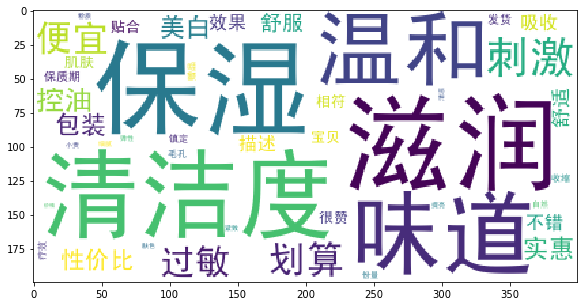

In [6]:
wordcloud=WordCloud(font_path="data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

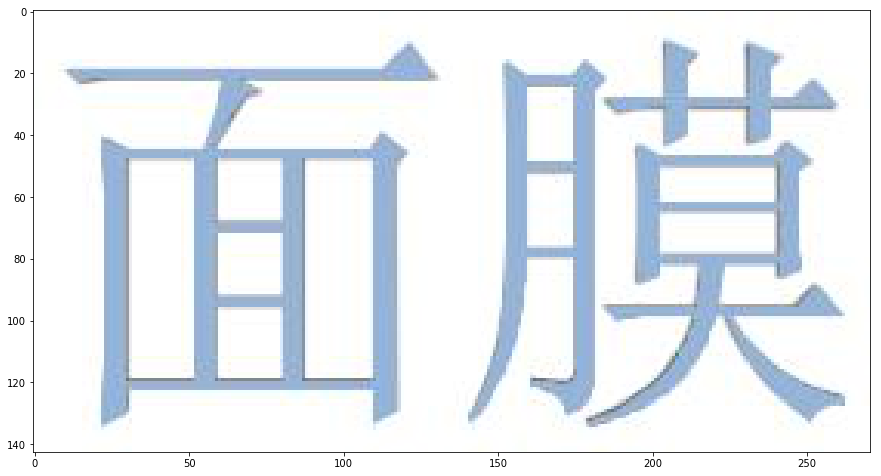

In [12]:
A = Image.open("image/1.jpg", 'r')
plt.imshow(A)

In [32]:
for i in range(28):
    print("描述相符",end=""),

描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符描述相符

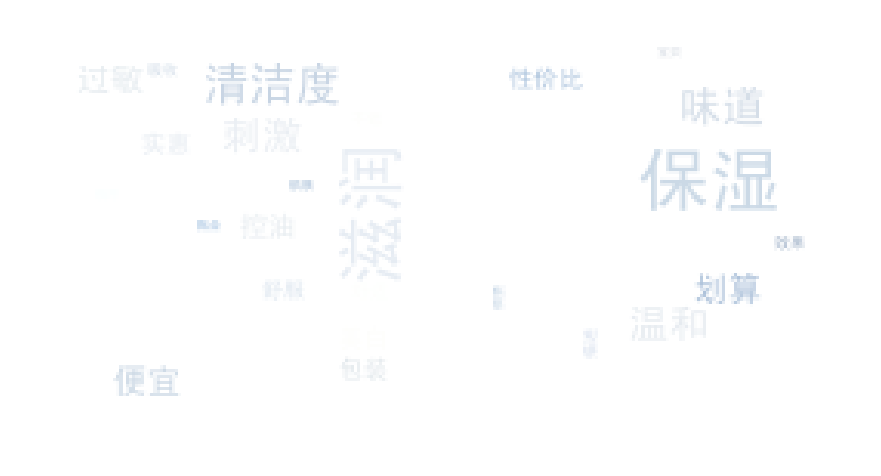

In [13]:
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
bimg=imread('image/1.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='data/simhei.ttf',max_font_size=200)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))